# Corrección del vignetting en imágenes

## 1. Integrantes del grupo

Este trabajo pertenece al Grupo 18 - Equipo 3. Los integrantes somos:
- Irene Fanjul i Penella
- Miguel Jiménez Gomis
- Carles Serra Vendrell
- Adrián Bañuls Arias
- Miriam Pardo Cuesta

## 2. Organización de las reuniones

| Reuniones | Descripción |
|------------|:-----------------------------------------------------------------------------------------------------------------------:|
| 17/12/2020 | Planificación de tareas a realizar. Elección anomalía. | 
| 26/12/2020 | Puesta en común de las posible soluciones investigadas. |
| 03/01/2021 | Elección de la solución que proporciona mejores resultados. Elaboración de la memoria y analisis de las conclusiones. | 

Todos los integrantes del grupo han participado en todas las reuniones.

## 3. Descripción del problema

El vignetting o viñeteado ocurre cuando en las fotografías aparecen los bordes más oscuros. Es decir, la luminosidad o saturación se reduce hacia la periferia de la imagen, mientras que el centro de ésta se conserva intacto. Este efecto tiene una simetría radial y ocurre muchas veces debido a los ajustes de la cámara o las limitaciones de las lentes.

En este notebook se propone una solución para corregir el vignetting. Para ello, se ha construido un filtro Gaussiano. La propuesta de solución se puede ver con más detalle en el siguiente apartado.

## 4. Solución propuesta

La solución que se propone en este trabajo se ha obtenido a partir del concepto de cómo se crea el vignetting en las imágenes. Analizando el código que se emplea para crear este filtro [[1]](#bib) y aplicando lógica inversa, se ha obtenido una solución capaz de eliminar el efecto vignetting de las imágenes.

In [1]:
# Aquí se importan las librerías necesarias y se define la función que aplica la corrección del vignetting.

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def correccion_vignetting(img, sigma1, sigma2):
    """Esta función toma como argumentos la imagen a corregir y los parámetros sigma1 y sigma2.
    
    img -- Imagen a procesar
    sigma1 -- Desviación estándar Gaussiana (en anchura).
    sigma2 -- Desviación estándar Gaussiana (en altura).
    """
    
    height, width, rgb = img.shape
    original = img.copy()

    # Generamos un kernel Gaussiano 2D, el cual utilizaremos para corregir el vignetting de la imagen
    kernel_w = cv2.getGaussianKernel(width, sigma1)
    kernel_h = cv2.getGaussianKernel(height, sigma2)
    kernel = kernel_h * kernel_w.T

    # Normalizamos el filtro Gaussiano para que tome valores en el intervalo [0,1]
    filtro = kernel / np.max(kernel)
    
    for i in range(height):
        for j in range(width):
            if (filtro[i,j]==0.0):
                filtro[i,j]=0.0001 # No puede haber valores nulos en el filtro, puesto que estará dividiendo
            else:
                continue
    
    # Los diferentes canales de color de la imagen original
    redi = original[:,:,0]
    greeni = original[:,:,1]
    bluei = original[:,:,2]

    """
    El filtro se aplica a cada canal de color de la imagen de entrada. El filtro
    tiene valores cercanos a cero en las mismas posiciones que los márgenes de la imagen
    de entrada y valores cercanos a uno en la zona central. Por consiguiente, al aplicar
    el filtro a la imagen de entrada en forma de división, los márgenes de ésta tomarán
    valores más alejados de 0 (del negro) y se eliminará el vignetting. En cambio, los
    píxeles en la zona central de la imagen no se verán muy afectados puesto que se
    dividen por valores próximos a la unidad.      
    """       
    for i in range(rgb):
        img[:,:,i] = np.where((img[:,:,i]/filtro) < 255, img[:,:,i]/filtro, 255)

    # Los diferentes canales de color de la imagen final
    redf = img[:,:,0]
    greenf = img[:,:,1]
    bluef = img[:,:,2]

    # Se muestran los histogramas por canales, tanto de la imagen inicial como de la final.
    # De esta manera, se puede observar el efecto que tiene nuestro filtro en la imagen original.
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,5))
    ax1.set_title('Histograma del color rojo en la imagen original')
    ax1.hist(redi.ravel(), 256, [0,256], color='r')
    ax2.set_title('Histograma del color verde en la imagen original')
    ax2.hist(greeni.ravel(), 256, [0,256], color='g')
    ax3.set_title('Histograma del color azul en la imagen original')
    ax3.hist(bluei.ravel(), 256, [0,256], color='b')
    ax4.set_title('Histograma del color rojo en la imagen final')
    ax4.hist(redf.ravel(), 256, [0,256], color='r')
    ax5.set_title('Histograma del color verde en la imagen final')
    ax5.hist(greenf.ravel(), 256, [0,256], color='g')
    ax6.set_title('Histograma del color azul en la imagen final')
    ax6.hist(bluef.ravel(), 256, [0,256], color='b')
    plt.tight_layout()
    plt.show()

    # Se muestra la imagen inicial y la imagen corregida
    f, (o, sv) = plt.subplots(ncols=2, figsize=(20,20))
    o.set_title('Imagen original')
    o.imshow(original)
    sv.set_title('Imagen corregida')
    sv.imshow(img)

## 5. Ejecución paso a paso

Se han escogido 2 imágenes afectadas por el efecto vignetting y se ha procedido a aplicar la función definida para corregirlas. 
En este apartado se puede ver que, parametrizando el algoritmo, sirve para corregir el artefacto en sí, independientemente de la imagen.

### 5.1. Primera imagen

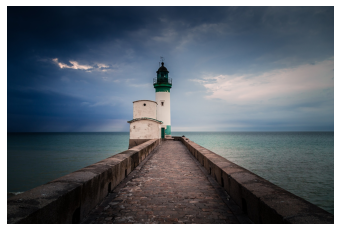

In [2]:
# Se carga la imagen que se quiere corregir

img1 = io.imread('./vignetting6.jpg')

plt.imshow(img1)
# Para que no aparezcan los números en los ejes
plt.axis('off')
plt.show()

Ahora, se aplica el algoritmo propuesto para la corrección del vignetting.

Los parámetros sigma1 y sigma2 se han escogido mediante ensayo y error, buscando emplear unos valores que proporcionen una buena solución. Cuanto más altos sean estos valores, más suave será la corrección que se aplica, mientras que cuanto más bajos sean más fuerte será la corrección.

Unos valores de sigma demasiado bajos producirán una saturación del brillo en la imagen. En cambio, si los valores son altos la corrección que se hace del vignetting es más suave, llegando al punto de que si se usan valores demasiado altos no se observará ningún tipo de modificación de la imagen final respecto a la imagen inicial.

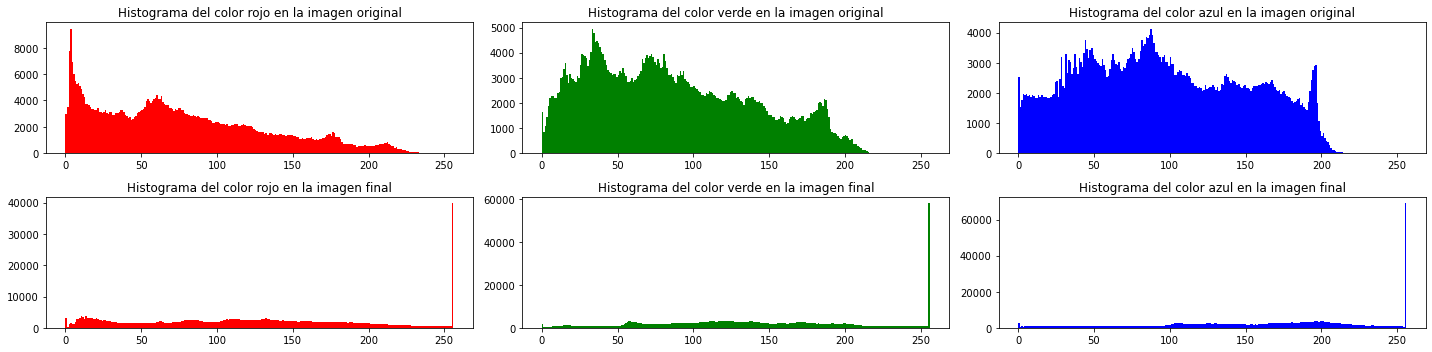

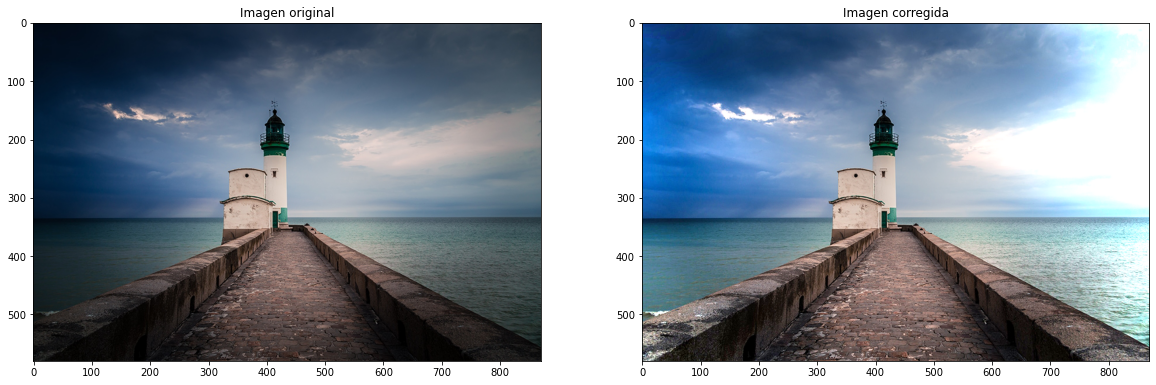

In [3]:
correccion_vignetting(img1,270,270) 

### 5.2. Segunda imagen

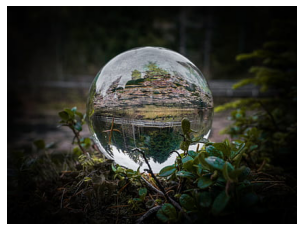

In [4]:
# Se carga la imagen que se quiere corregir

img2 = io.imread('./vignetting9.jpg')

plt.imshow(img2)
# Para que no aparezcan los números en los ejes
plt.axis('off')
plt.show() 

Para corregir del vignetting, se aplica el algoritmo propuesto.

Al igual que en la imagen anterior, se escogen sigma1 y sigma2 buscando la mejor corrección posible.

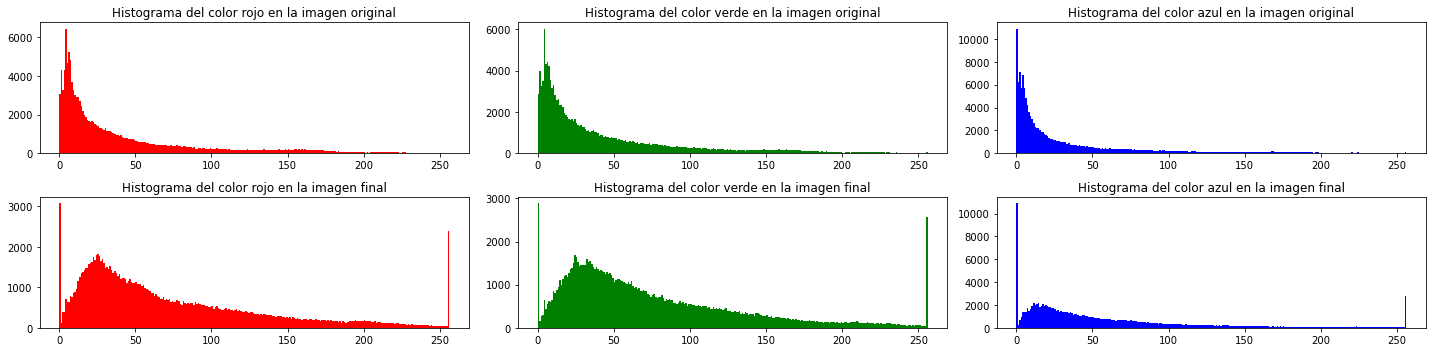

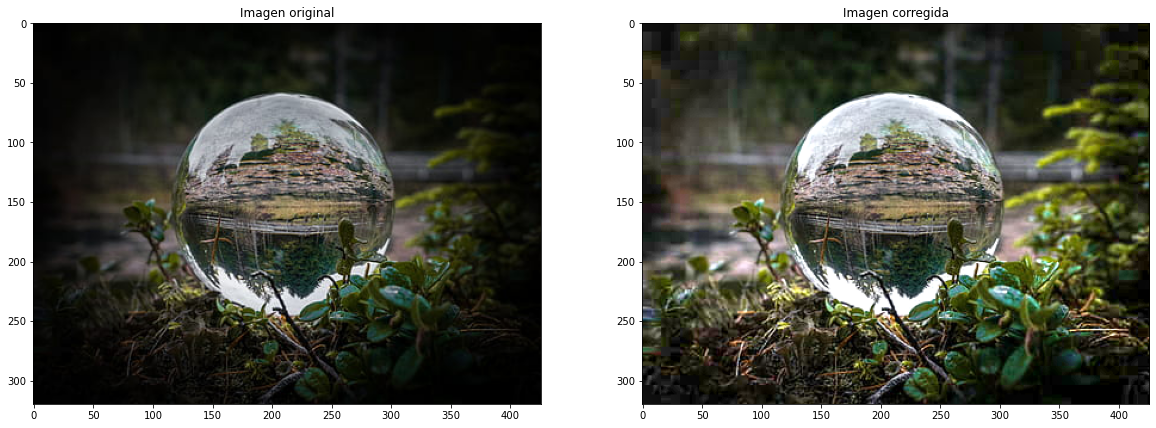

In [5]:
correccion_vignetting(img2,110,110)

## 6. Conclusiones

El filtro que se ha aplicado en cada imagen es un filtro genérico que no tiene en cuenta las características de la propia imagen. Por ello, es posible que si en la imagen que se trata de corregir hay tonalidades cercanas al blanco éstas se saturen al aplicar el filtro. De hecho, la primera imagen escogida en este trabajo tiene valores cercanos al blanco cerca de los bordes de la imagen y al aplicar el filtro estos píxeles se saturan más de lo debido.

## 7. Bibliografía

In [6]:
%%html
<a id='bib'></a>
<i>[1] 03/01/2021, Packt, https://subscription.packtpub.com/book/application_development/9781785283932/2/ch02lvl1sec25/creating-a-vignette-filter </i>